# Cross-sectional analysis with Vector Auto Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

import yfinance as yf

In [2]:
dataset = pd.read_csv("apple_2023_masked.csv")

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517


In [4]:
dataset.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,193.071426,193.071426,193.071426
249,2023-12-29 00:00:00-05:00,193.390581,193.889267,191.226284,192.024185,42628800,0.0,0.0,192.024185,192.024185,192.024185,192.024185,192.024185


In [5]:
google = yf.Ticker("GOOG")
apple = yf.Ticker("AAPL")
microsoft = yf.Ticker("MSFT")
nvidia = yf.Ticker("NVDA")
amazon = yf.Ticker("AMZN")
meta = yf.Ticker("META")

google_data = google.history(start='2023-01-01', end='2024-01-01')
apple_data = apple.history(start='2023-01-01', end='2024-01-01')
microsoft_data = microsoft.history(start='2023-01-01', end='2024-01-01')
nvidia_data = nvidia.history(start='2023-01-01', end='2024-01-01')
amazon_data = amazon.history(start='2023-01-01', end='2024-01-01')
meta_data = meta.history(start='2023-01-01', end='2024-01-01')

In [6]:
apple_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0
2023-12-26 00:00:00-05:00,193.101358,193.380621,192.323408,192.542831,28919300,0.0,0.0
2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0
2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0
2023-12-29 00:00:00-05:00,193.390581,193.889267,191.226284,192.024185,42628800,0.0,0.0


<Axes: >

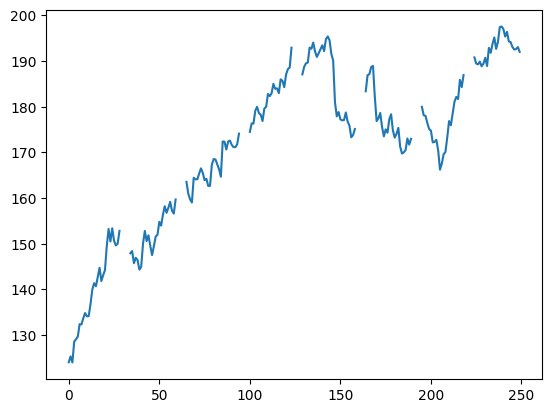

In [7]:
dataset["5day"].plot()

In [8]:
nvidia_data["Close"].reset_index().drop(columns=["Date"])

,Close
0,143.079803
1,147.417694
2,142.580048
3,148.517120
4,156.203354
...,...
245,488.277069
246,492.766907
247,494.146820
248,495.196777


In [80]:
del temp
temp = pd.DataFrame()
temp["Apple Close"] = apple_data["Close"].reset_index().drop(columns=["Date"])
temp["Nvidia Close"] = nvidia_data["Close"].reset_index().drop(columns=["Date"])
temp["Microsoft Close"] = microsoft_data["Close"].reset_index().drop(columns=["Date"])

In [79]:
temp.corr()

,Nvidia Close,Apple Close,Microsoft Close
Nvidia Close,1.000000,0.921846,0.936636
Apple Close,0.921846,1.000000,0.948934
Microsoft Close,0.936636,0.948934,1.000000


In [ ]:
close_df = pd.DataFrame()
close_df["Apple"] = apple_data.Close
close_df["Google"] = google_data.Close
close_df["Microsoft"] = microsoft_data.Close
close_df["Nvidia"] = nvidia_data.Close
close_df["Amazon"] = amazon_data.Close
close_df["Meta"] = meta_data.Close
close_df

In [8]:
# del close_df_filled
close_df_filled = pd.DataFrame()
close_df_filled["Missing"] = dataset["5day"].copy()
close_df_filled["VAR_Imputation"] = close_df_filled["Missing"].interpolate()
close_df_filled["Nvidia"] = nvidia_data["Close"].reset_index().drop(columns=["Date"])
close_df_filled["Amazon"] = amazon_data["Close"].reset_index().drop(columns=["Date"])
close_df_filled["Microsoft"] = microsoft_data["Close"].reset_index().drop(columns=["Date"])
close_df_filled["Meta"] = meta_data["Close"].reset_index().drop(columns=["Date"])
close_df_filled["Google"] = google_data["Close"].reset_index().drop(columns=["Date"])
close_df_filled

,Missing,VAR_Imputation,Nvidia,Amazon,Microsoft,Meta,Google
0,124.048042,124.048042,143.079773,85.820000,236.609238,124.607788,89.699997
1,125.327515,125.327515,147.417679,85.139999,226.259186,127.235008,88.709999
2,123.998451,123.998451,142.580048,83.120003,219.553375,126.805458,86.769997
3,128.560867,128.560867,148.517120,86.080002,222.140854,129.882202,88.160004
4,129.086517,129.086517,156.203369,87.360001,224.303726,129.332779,88.800003
...,...,...,...,...,...,...,...
245,193.091385,193.091385,488.277069,153.419998,373.215393,353.015472,142.720001
246,192.542816,192.542816,492.766907,153.410004,373.295135,354.453918,142.820007
247,192.642548,192.642548,494.146820,153.339996,372.707275,357.450714,141.440002
248,193.071426,193.071426,495.196777,153.380005,373.912842,357.940216,141.279999


In [9]:
# Fit the VAR model
model = VAR(close_df_filled.drop(columns = ["Missing"]))
results = model.fit(maxlags=10, ic='aic')

In [16]:
len(close_df_filled[close_df_filled["Missing"].isna()])

35

In [12]:
help(results.forecast)

Help on method forecast in module statsmodels.tsa.vector_ar.var_model:

forecast(y, steps, exog_future=None) method of statsmodels.tsa.vector_ar.var_model.VARResults instance
    Produce linear minimum MSE forecasts for desired number of steps
    ahead, using prior values y
    
    Parameters
    ----------
    y : ndarray (p x k)
    steps : int
    
    Returns
    -------
    forecasts : ndarray (steps x neqs)
    
    Notes
    -----
    Lütkepohl pp 37-38



In [13]:
dataset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,193.071426,193.071426,193.071426


In [10]:
def impute_missing_values(data, results):
    col_name = "5day"
    for i in range(len(data)):
        if np.isnan(data[col_name].iloc[i]):  # Check if the stock price is np.nan
            # Get the previous available data points up to the maxlags
            data_slice = data.iloc[i - results.k_ar:i].values
            if len(data_slice) == results.k_ar:
                forecast = results.forecast(data_slice, steps=1)
                data[col_name].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
    return data

In [11]:
impute_missing_values(dataset.drop(columns=["Date", "Open", "High", "Low", "Volume", "Dividends", "Stock Splits", "1day", "2day", "3day", "4day"]).copy(), results)

ValueError: shapes (6,6) and (2,) not aligned: 6 (dim 1) != 2 (dim 0)

In [ ]:
# Impute the missing values
imputed_data = impute_missing_values(dataset.drop(columns=["Date", "Open", "High", "Low", "Volume", "Dividends", "Stock Splits", "1day", "2day", "3day", "4day"]).copy(), results)

In [21]:
dataset.drop(columns=["Date", "Open", "High", "Low", "Volume", "Dividends", "Stock Splits", "1day", "2day", "3day", "4day"])

,Close,5day
0,124.048042,124.048042
1,125.327515,125.327515
2,123.998451,123.998451
3,128.560867,128.560867
4,129.086517,129.086517
...,...,...
245,193.091385,193.091385
246,192.542816,192.542816
247,192.642548,192.642548
248,193.071426,193.071426


In [27]:
dataset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,193.071426,193.071426,193.071426


In [31]:
imputed_data

,Close,5day
0,124.048042,124.048042
1,125.327515,125.327515
2,123.998451,123.998451
3,128.560867,128.560867
4,129.086517,129.086517
...,...,...
245,193.091385,193.091385
246,192.542816,192.542816
247,192.642548,192.642548
248,193.071426,193.071426


<Axes: >

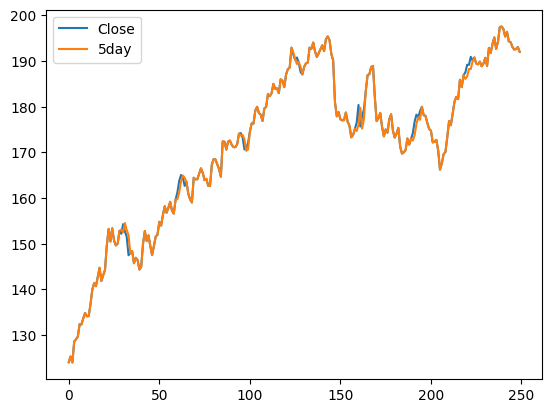

In [32]:
imputed_data.plot()

In [41]:
len_missing_data = len(dataset[dataset["5day"].isna()])

In [42]:
mean_squared_error(imputed_data["Close"], imputed_data["5day"])*(len(dataset)/len_missing_data)

4.0240171496622725

In [81]:
dataset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,193.071426,193.071426,193.071426


In [91]:
col_name = "1day"
len_missing_data = len(dataset[dataset[col_name].isna()])
mean_squared_error(dataset["Close"], dataset[col_name].interpolate(method="linear"))*(len(dataset)/len_missing_data)

0.679228361280242

In [92]:
lin_interpolMSE = [0.679228361280242 ,2.526317467717179 ,1.8751985815220782 ,3.398599024755626 ,3.475544046464251]

In [48]:
aapl_data_diffs = dataset["Close"]

In [74]:
print(dataset["Close"].diff().dropna().mean())
print(dataset["Close"].diff().dropna().std())
print(dataset["Close"].diff().dropna().skew())
print(dataset["Close"].diff().dropna().kurt())

0.2729965577642603
2.1115191949937477
-0.25687589474057393
1.8192857219656737


<Axes: >

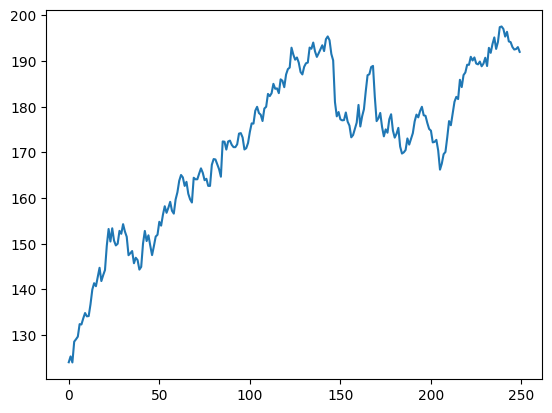

In [73]:
dataset["Close"].diff()

In [70]:
dataset["Close"]

0      124.048042
1      125.327515
2      123.998451
3      128.560867
4      129.086517
          ...    
245    193.091385
246    192.542816
247    192.642548
248    193.071426
249    192.024185
Name: Close, Length: 250, dtype: float64

In [49]:
aapl_data_diffs = aapl_data_diffs.diff()
aapl_data_diffs

0           NaN
1      1.279472
2     -1.329063
3      4.562416
4      0.525650
         ...   
245   -1.077133
246   -0.548569
247    0.099731
248    0.428879
249   -1.047241
Name: Close, Length: 250, dtype: float64

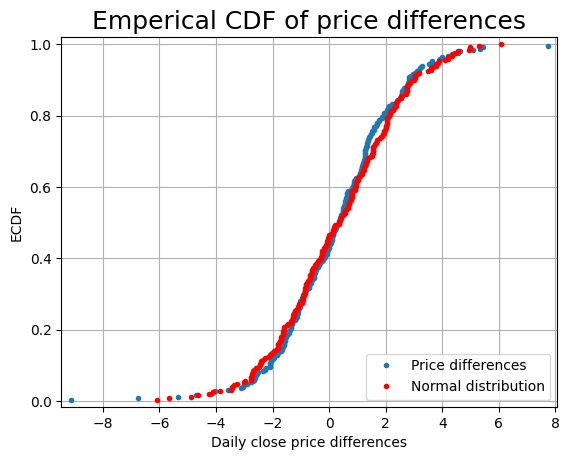

In [67]:
import matplotlib.pyplot as plt

x = np.sort(aapl_data_diffs)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')

x_2 = np.sort(aapl_data_diffs.mean()+ aapl_data_diffs.std()*np.random.randn(len(x)))
_ = plt.plot(x_2, y, marker='.', linestyle='none', color='red')
_ = plt.xlabel('Daily close price differences')
_ = plt.ylabel('ECDF')
plt.legend(('Price differences', 'Normal distribution'), loc='lower right')
plt.margins(0.02) # Keeps data off plot edgesplt.show()
plt.grid()

plt.title('Emperical CDF of price differences', fontsize=18)
plt.savefig("ECDF")
plt.show()

In [69]:
close_df_filled["Nvidia"]

0      143.079803
1      147.417679
2      142.580032
3      148.517120
4      156.203369
          ...    
245    488.277069
246    492.766907
247    494.146820
248    495.196777
249    495.196777
Name: Nvidia, Length: 250, dtype: float64

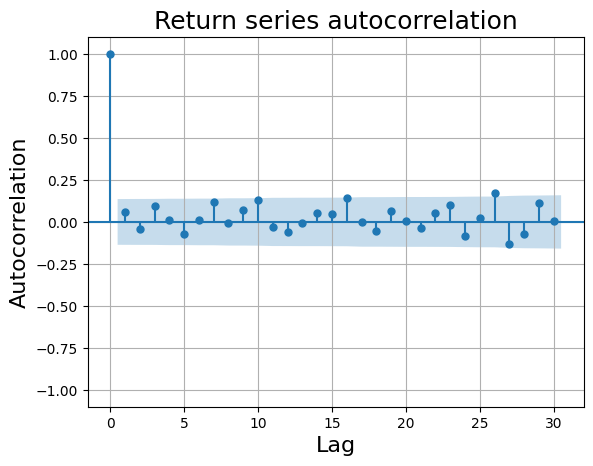

In [16]:
sm.graphics.tsa.plot_acf(dataset["5day"].diff().dropna(),
                            lags = 30)

plt.title('Return series autocorrelation', fontsize=18)
plt.ylabel("Autocorrelation", fontsize=16)
plt.xlabel("Lag", fontsize=16)
plt.grid()

plt.ylim(-1.1,1.1)
plt.savefig("ReturnSeriesAutocorrelation")

plt.show()

In [19]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517


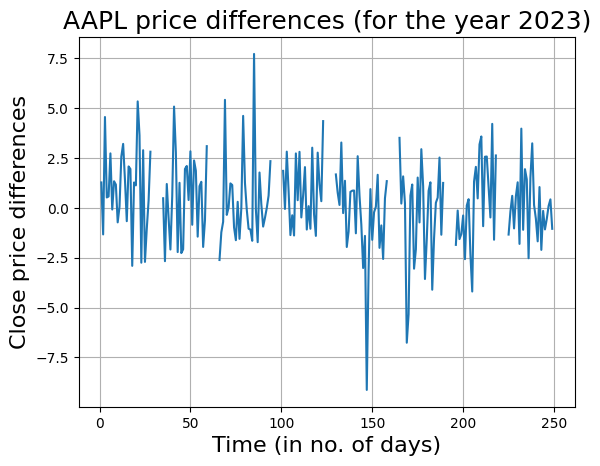

In [46]:
from datetime import datetime
y = dataset["5day"].diff()
x = dataset.index
_ = plt.plot(x, y)
# _ = plt.plot(x, y, marker='.', linestyle='none')

plt.title('AAPL price differences (for the year 2023)', fontsize=18)
plt.ylabel("Close price differences", fontsize=16)
plt.xlabel("Time (in no. of days)", fontsize=16)
# plt.xticks([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])
plt.grid()

# plt.ylim(-1.1,1.1)
plt.savefig("PriceDifferences")

plt.show()

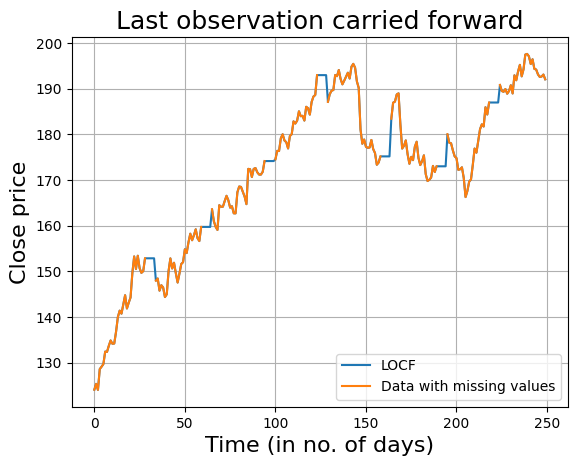

In [80]:
y = dataset["5day"]
y_ffill = dataset["5day"].ffill()
x = dataset.index
_ = plt.plot(x, y_ffill)
_ = plt.plot(x, y)

# _ = plt.plot(x, y, marker='.', linestyle='none')

plt.title('Last observation carried forward', fontsize=18)
plt.ylabel("Close price", fontsize=16)
plt.xlabel("Time (in no. of days)", fontsize=16)
# plt.xticks([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])
plt.legend(('LOCF', 'Data with missing values'), loc='lower right')
plt.grid()

# plt.ylim(-1.1,1.1)
plt.savefig("LOCF")

plt.show()

In [83]:
len_missing_data = len(dataset[dataset["5day"].isna()])
mean_squared_error(y_ffill, dataset["Close"]) *(len(y_ffill)/len_missing_data)

11.138037167303269

In [84]:
mean_squared_error(dataset["5day"].interpolate(method="linear"), dataset["Close"])*(len(y_ffill)/len_missing_data)

3.475544046464251

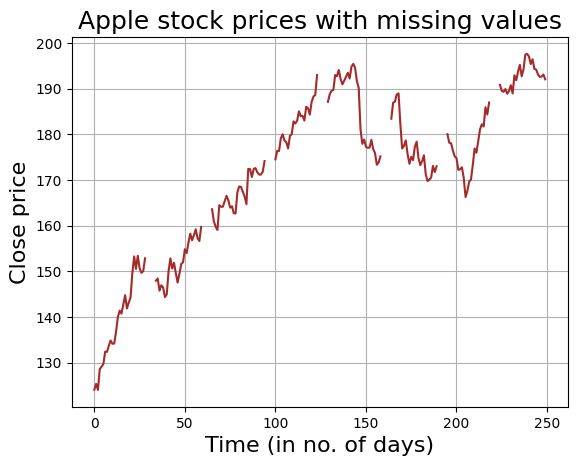

In [94]:
y = dataset["5day"]
# y_ffill = dataset["5day"].ffill()
x = dataset.index
# _ = plt.plot(x, y_ffill)
# _ = plt.plot(x, y)

_ = plt.plot(x, y, c='brown')

plt.title('Apple stock prices with missing values', fontsize=18)
plt.ylabel("Close price", fontsize=16)
plt.xlabel("Time (in no. of days)", fontsize=16)
# plt.xticks([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])
# plt.legend(('LOCF', 'Data with missing values'), loc='lower right')
plt.grid()

# plt.ylim(-1.1,1.1)
plt.savefig("OriginalDataset")

plt.show()

In [97]:
dataset.drop(columns = ["1day", "2day", "3day", "4day", "5day"]).head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0


In [96]:
dataset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,1day,2day,3day,4day,5day
0,2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
1,2023-01-04 00:00:00-05:00,125.853183,127.608724,124.057975,125.327515,89113600,0.0,0.0,125.327515,125.327515,125.327515,125.327515,125.327515
2,2023-01-05 00:00:00-05:00,126.091211,126.725981,123.740581,123.998451,80962700,0.0,0.0,123.998451,123.998451,123.998451,123.998451,123.998451
3,2023-01-06 00:00:00-05:00,124.980372,129.225391,123.869520,128.560867,87754700,0.0,0.0,128.560867,128.560867,128.560867,128.560867,128.560867
4,2023-01-09 00:00:00-05:00,129.403910,132.319889,128.828647,129.086517,70790800,0.0,0.0,129.086517,129.086517,129.086517,129.086517,129.086517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
246,2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
247,2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548
248,2023-12-28 00:00:00-05:00,193.629953,194.148591,192.662500,193.071426,34049900,0.0,0.0,193.071426,193.071426,193.071426,193.071426,193.071426
